<h1>TP Bagging and Random Forests</h1>

## Imports

In [29]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVR, SVC
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_boston, load_diabetes, load_iris, load_digits

import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score
from scipy.stats import binom 

from tparbressource import (rand_gauss, rand_bi_gauss, rand_tri_gauss,
                              rand_checkers, rand_clown, plot_2d,
                              frontiere,frontiere_new)

## Math Question

<h5> The prediction of the aggregation of models follows a Binomial distribution with parameters p and L (Why?). </5>

Suppose that for a given inpt x, we have L independant classifiers $f^k(x), k=1,2,...L $, and each classifier has a probability of correct classification of p.<br>
Assume that the true class at x is 1, so<br>
$\mathbb{P}(\hat{f}^k(x)=y)=p,( k=1,2,...L )$<br>
$\hat{f}^{bag}(x)= \underset{z=\{0,1\}}{\mathrm{argmax}} \sum \mathbb{1}\{{\hat{f}^{k}(x)=z}\}$<br>
Let $B=\sum \mathbb{1}\{{\hat{f}^{k}(x)=y}\}$ be the number of votes for correct class y. Since the binomial distribution is the distribution of number of successes in a sequence of independent experiments, thus the number of correct prediction in the aggregating model follows a binomial distribution:<br>
$B \sim Binom(L,p)$<br>

<h5> If p = 0.7 (which means a probability slightly greater than by chance) and L = 10, which is the probability of correct prediction for the aggregation of models?</h5>

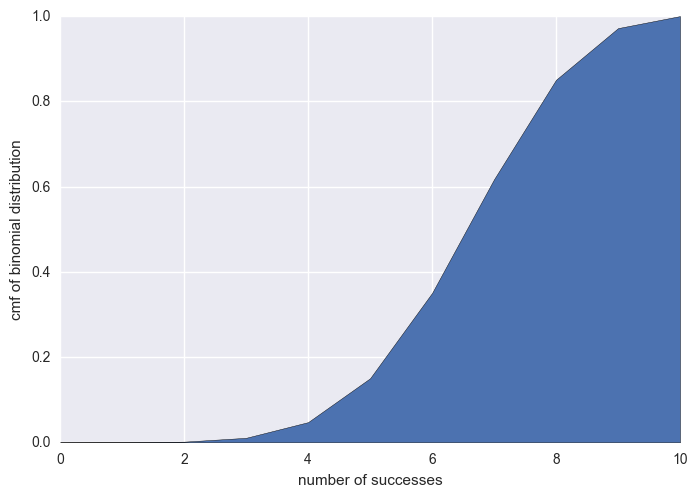

If the aggregating model gets more than L/2 successes within all classifiers, then we consider it gets the correct prection.
The probability of correct prediction for the aggregating models: 0.8497316674


In [30]:
# Math question : 
# Q1
L=10
p=0.7
rv = binom(L, p)
fig, ax = plt.subplots()
ax.fill_between(range(L+1), rv.cdf(range(L+1)),0)
ax.grid(True, zorder=5)
plt.xlabel('number of successes')
plt.ylabel('cmf of binomial distribution')
plt.show()
print("If the aggregating model gets more than L/2 successes within all classifiers, then we consider it gets the correct prection.")
print('The probability of correct prediction for the aggregating models:', 1-rv.cdf(5))

## PART 1  Bagging

## Question 1

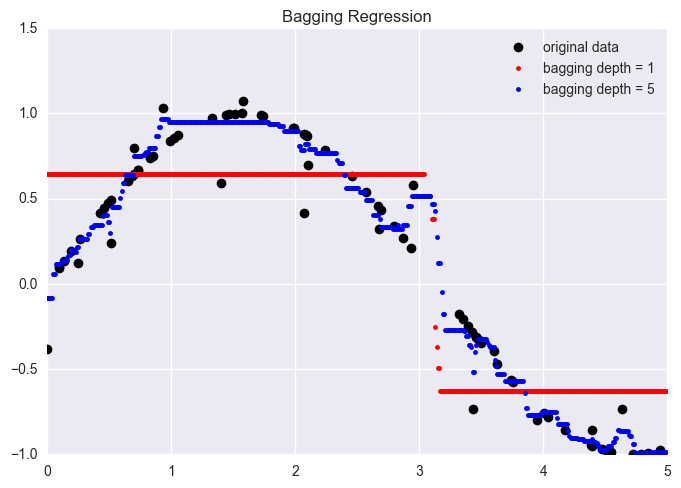

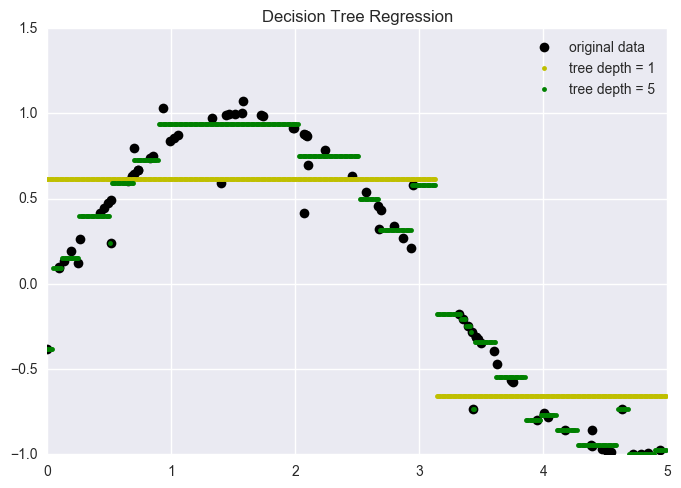

In [31]:
######################################################################
#                    Create a random dataset                         #
######################################################################
def generate1():
    # Create a random dataset 
    rng = np.random.RandomState(1) 
    X = np.sort(5 * rng.rand(80, 1), axis=0) 
    y = np.sin(X).ravel() 
    y[::5] += 1 * (0.5 - rng.rand(16))     
    return X,y
X,y = generate1()
# X_test and y_test
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis] 
y_test = np.sin(X_test).ravel()
######################################################################
#                    Define the constant values                      #
######################################################################

n_estimators = 10 # L in the text 
tree_max_depth = 10 
bagging_max_depth = 10 

######################################################################
#           Use bagging with decision trees with depth  1            #
######################################################################
tree1 = DecisionTreeRegressor(criterion='mse', splitter='best',max_depth=1)
tree1.fit(X, y) 

#initialisation of a bagging
bagging1 = BaggingRegressor(base_estimator = tree1, n_estimators = 10, max_samples=0.8, bootstrap_features=True) 
bagging1.fit(X, y) 

## predict
y_tree1 = tree1.predict(X_test)
y_bagging1 = bagging1.predict(X_test) 

######################################################################
#  Use bagging with decision trees characterized by a greater depth  #
######################################################################
tree5 = DecisionTreeRegressor(criterion='mse', splitter='best',max_depth=5)
tree5.fit(X, y) 

#initialisation of a bagging
bagging5 = BaggingRegressor(base_estimator = tree5, n_estimators = 10, max_samples=0.8, bootstrap_features=True) 
bagging5.fit(X, y) 

## predict
y_tree5 = tree5.predict(X_test) 
y_bagging5 = bagging5.predict(X_test) 

######################################################################
#                      Plot the results                              #
######################################################################
# Plot the results of baggings
# plt.figure(figsize=(12, 8)) 
plt.plot(X, y, 'o', c="k", label="original data") 
# TODO add plots for Bagging 
plt.plot(X_test, y_bagging1, '.', c="r", label="bagging depth = 1") 
plt.plot(X_test, y_bagging5, '.', c="b", label="bagging depth = 5") 
plt.title("Bagging Regression") 
plt.legend(loc=1, numpoints=1) 
plt.show()

# Plot the results of trees
# plt.figure(figsize=(12, 8)) 
plt.plot(X, y, 'o', c="k", label="original data") 
# TODO add plots for Tree 
plt.plot(X_test, y_tree1, '.', c="y", label="tree depth = 1") 
plt.plot(X_test, y_tree5, '.', c="g", label="tree depth = 5")
plt.title("Decision Tree Regression")
plt.legend(loc=1, numpoints=1) 
plt.show()

这两张图commenter一下吧。

## Question 2

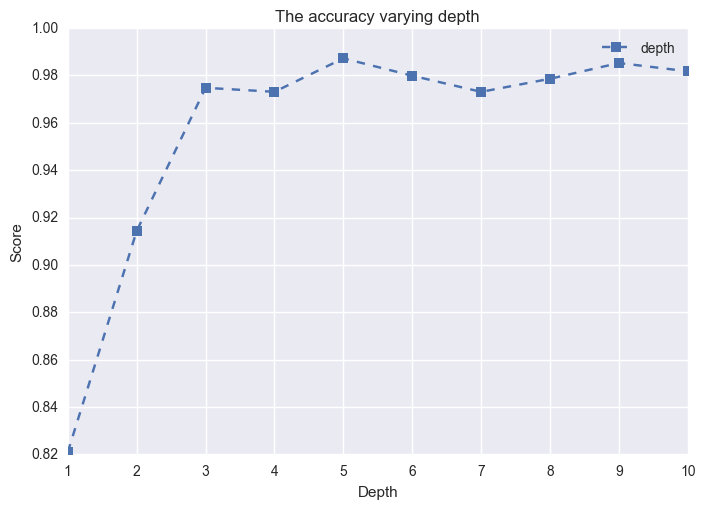

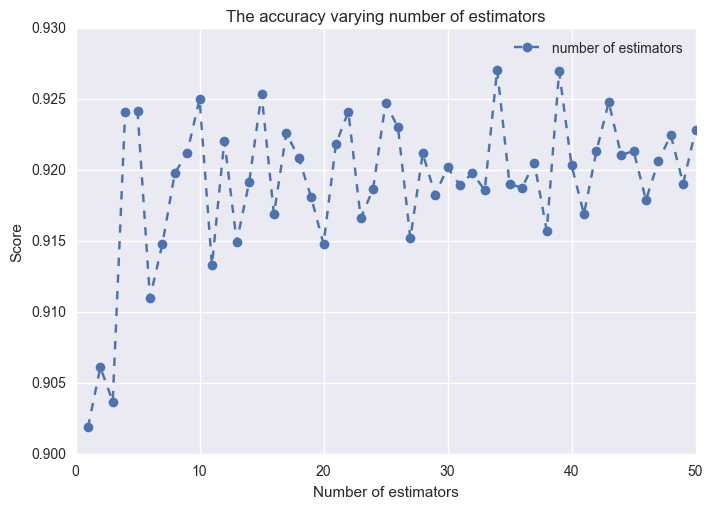

In [32]:
scores_depth=[]
scores_L=[]

# Plot the results 
#plt.figure(figsize=(12, 8)) 
#plt.plot(X, y, 'o', c="k", label="original data") 


######################################################################
#             Define the intervalles of L and tree depth             #
######################################################################
c_depth = range(1,11)
c_L = range(1,51)

for i in c_depth:
    tree = DecisionTreeRegressor(criterion='mse', splitter='best',max_depth=i)
    tree.fit(X, y) 
    bagging = BaggingRegressor(base_estimator = tree, n_estimators = 10, max_samples=0.8, bootstrap_features=True) 
    bagging.fit(X, y) 
    # Predict 
    score = bagging.score(X_test,y_test)
    scores_depth.append(score);



for m in c_L:
    tree = DecisionTreeRegressor(criterion='mse', splitter='best',max_depth=2)
    tree.fit(X, y) 
    bagging = BaggingRegressor(base_estimator = tree, n_estimators = m, max_samples=0.8, bootstrap_features=True) 
    bagging.fit(X, y) 
    # Predict 
    score = bagging.score(X_test,y_test)
    scores_L.append(score);

    
# TODO add plots for Bagging/Tree 
# plt.figure(figsize=(12, 8)) 
plt.plot(c_depth, scores_depth,'--',label='depth',marker='s')
plt.title("The accuracy varying depth") 
plt.xlabel('Depth')
plt.ylabel('Score')
plt.legend(loc=1, numpoints=1) 
plt.show()


# TODO add plots for Bagging/Tree 
# plt.figure(figsize=(12, 8)) 
plt.plot(c_L, scores_L,'--',label='number of estimators',marker='o')
plt.title("The accuracy varying number of estimators") 
plt.xlabel('Number of estimators')
plt.ylabel('Score')
plt.legend(loc=1, numpoints=1) 
plt.show()

# print (scores_depth)
# print (scores_L)


## Question 3
<h5>How can we check that the estimators computed with the decision trees are biased and that the ones based on bagging reduce the variance? </h5>

In [33]:
# Settings
n_repeat = 50       # Number of iterations for computing expectations
n_train = 50        # Size of the training set
n_test = 1000       # Size of the test set
noise = 0.1         # Standard deviation of the noise
np.random.seed(0)

# Change this for exploring the bias-variance decomposition of other
# estimators. This should work well for estimators with high variance (e.g.,
# decision trees or KNN), but poorly for estimators with low variance (e.g.,
# linear models).
estimators = [("Tree", DecisionTreeRegressor()),
              ("Bagging(Tree)", BaggingRegressor(DecisionTreeRegressor(),max_samples = 0.7))]

n_estimators = len(estimators)

In [34]:
# Generate data
def f(x):
    x = x.ravel()
    #return np.sin(x)
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise, n_repeat=1):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X)

    if n_repeat == 1:
        y = f(X) + np.random.normal(0.0, noise, n_samples)
    else:
        y = np.zeros((n_samples, n_repeat))

        for i in range(n_repeat):
            y[:, i] = f(X) + np.random.normal(0.0, noise, n_samples)

    X = X.reshape((n_samples, 1))

    return X, y

In [35]:

def show_estimators(noise,showplot = 1,showformula = 1):
    ## The gereration of the data
    X_train = []
    y_train = []
    
    for i in range(n_repeat):
        X, y = generate(n_samples = n_train, noise=noise)
        X_train.append(X)
        y_train.append(y)

    X_test, y_test = generate(n_samples=n_test, noise=noise, n_repeat=n_repeat)
    
    # Loop over estimators to compare
    for n, (name, estimator) in enumerate(estimators):
        # Compute predictions
        y_predict = np.zeros((n_test, n_repeat))

        for i in range(n_repeat):
            estimator.fit(X_train[i], y_train[i])
            y_predict[:, i] = estimator.predict(X_test)

        # Bias^2 + Variance + Noise decomposition of the mean squared error
        y_error = np.zeros(n_test)

        for i in range(n_repeat):
            for j in range(n_repeat):
                y_error += (y_test[:, j] - y_predict[:, i]) ** 2

        y_error /= (n_repeat * n_repeat)

        y_noise = np.var(y_test, axis=1)
        y_bias = (f(X_test) - np.mean(y_predict, axis=1)) ** 2
        y_var = np.var(y_predict, axis=1)
        
        
        if showformula == 1:
            print ("{0}: {1:.4f} (error) = {2:.4f} (bias^2) "
            " + {3:.4f} (var) + {4:.4f} (noise)".format(name,
                                                        np.mean(y_error),
                                                        np.mean(y_bias),
                                                        np.mean(y_var),
                                                        np.mean(y_noise))) 
        if showplot == 1:
            # Plot figures
            plt.figure(figsize=(18, 12)) 
            plt.subplot(2, n_estimators, n + 1)
            plt.plot(X_test, f(X_test), "b", label="$f(x)$")
            plt.plot(X_train[0], y_train[0], ".b", label="LS ~ $y = f(x)+noise$")

            for i in range(n_repeat):
                if i == 0:
                    plt.plot(X_test, y_predict[:, i], "r", label="$\^y(x)$")
                else:
                    plt.plot(X_test, y_predict[:, i], "r", alpha=0.05)

            plt.plot(X_test, np.mean(y_predict, axis=1), "c",
                     label="$\mathbb{E}_{LS} \^y(x)$")

            #plt.xlim([-5, 5])
            plt.title(name)

            if n == 0 or n == 1:
                plt.legend(loc="upper left", prop={"size": 11})

            plt.subplot(2, n_estimators, n_estimators + n + 1)
            plt.plot(X_test, y_error, "r", label="$error(x)$")
            plt.plot(X_test, y_bias, "b", label="$bias^2(x)$"),
            plt.plot(X_test, y_var, "g", label="$variance(x)$"),
            plt.plot(X_test, y_noise, "c", label="$noise(x)$")

            #plt.xlim([-5, 5])
            #plt.ylim([0, 0.1])

            if n == 0 or n==1:
                plt.legend(loc="upper left", prop={"size": 11})

        plt.show()

Tree: 0.0255 (error) = 0.0003 (bias^2)  + 0.0152 (var) + 0.0098 (noise)


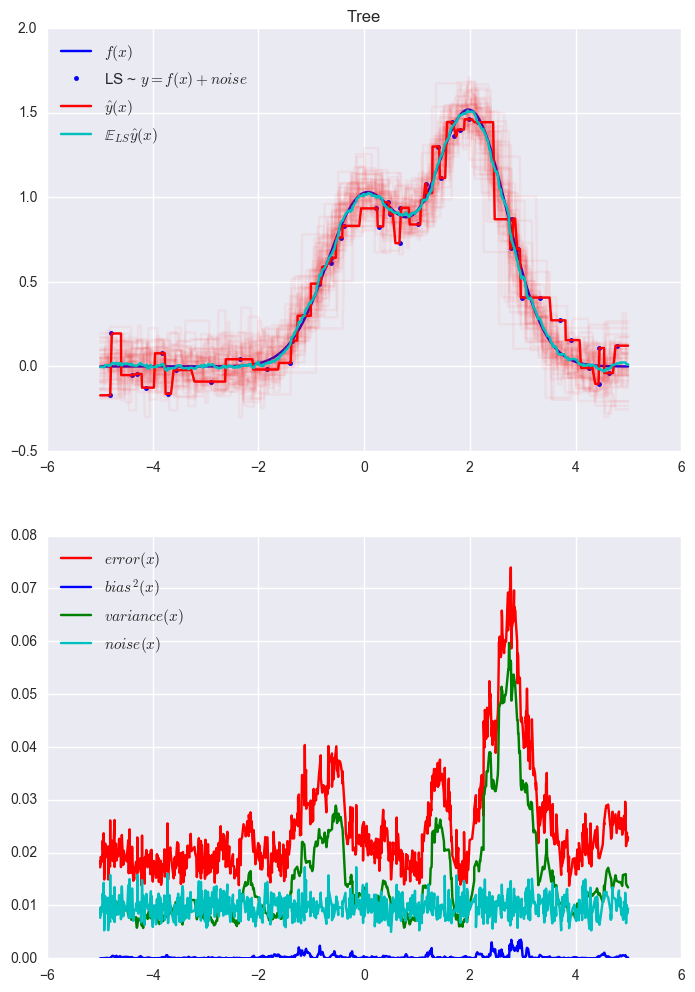

Bagging(Tree): 0.0191 (error) = 0.0008 (bias^2)  + 0.0083 (var) + 0.0098 (noise)


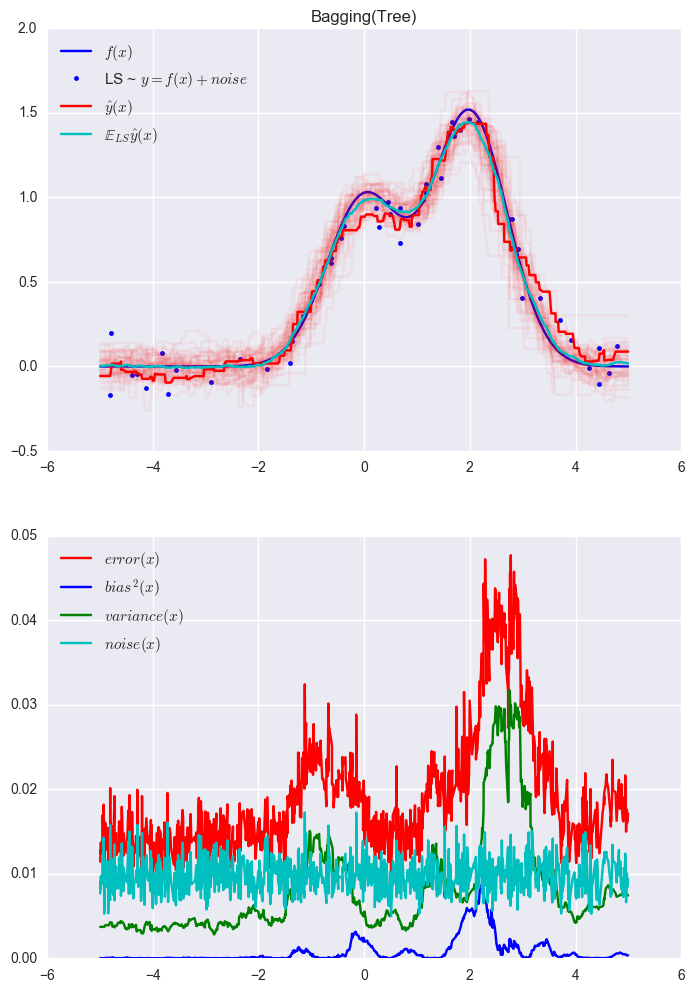

In [36]:
show_estimators(noise)

这几张图不commenter吗？

## Question 4
<h5>Playing with the noise level, show the over-fitting</h5>

In [37]:
def overfit(_estimator,_noise):
    
    X_train = []
    y_train = []
    
    n_repeat=30
    for i in range(n_repeat):
        X, y = generate(n_samples=n_train, noise=_noise)
        X_train.append(X)
        y_train.append(y)

    X_test, y_test = generate(n_samples=n_test, noise=_noise, n_repeat=n_repeat)
    
    
    # Loop over estimators to compare

    for n, (name, estimator) in enumerate(_estimator):
        # Compute predictions
        # y_predict = np.zeros((n_test, n_repeat))
        score = 0
        for i in range(n_repeat):
            estimator.fit(X_train[i], y_train[i],)
            for j in range(n_repeat):
                score += estimator.score(X_test,y_test[:,j])

        score /= (n_repeat * n_repeat)

        if n==0:
            score_tree = score
        if n==1:
            score_bagging = score
            
    return score_tree,score_bagging

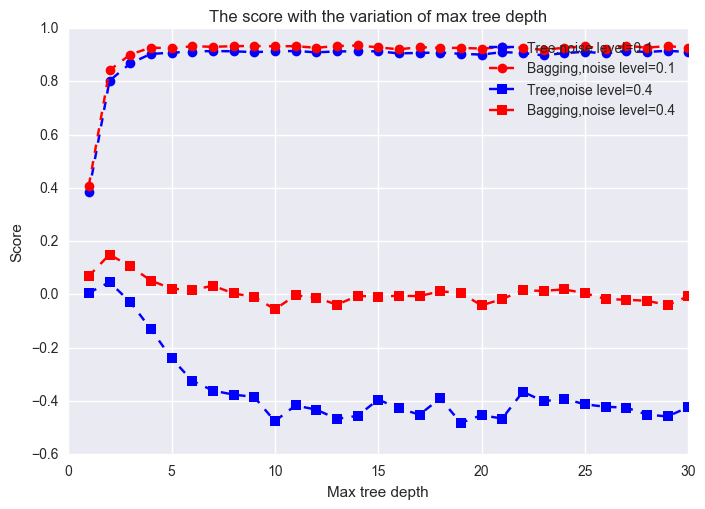

In [38]:
scores_tree = []
scores_bagging = []
c = range(1,31)
#score_tree,score_bagging = noise_level(noise)
for depth in c:
    estimators = [("Tree", DecisionTreeRegressor(max_depth=depth)),
              ("Bagging(Tree)", BaggingRegressor(DecisionTreeRegressor(max_depth=depth),max_samples = 0.7))]
    score_tree,score_bagging = overfit(estimators,0.1)
    scores_tree.append(score_tree)
    scores_bagging.append(score_bagging)
    #print score_tree,score_bagging
plt.plot(c,scores_tree, "--b", marker='o',label="Tree,noise level=0.1")
plt.plot(c,scores_bagging, "--r", marker='o',label="Bagging,noise level=0.1")
scores_tree = []
scores_bagging = []
for depth in c:
    estimators = [("Tree", DecisionTreeRegressor(max_depth=depth)),
              ("Bagging(Tree)", BaggingRegressor(DecisionTreeRegressor(max_depth=depth),max_samples = 0.7))]
    score_tree,score_bagging = overfit(estimators,0.8)
    scores_tree.append(score_tree)
    scores_bagging.append(score_bagging)
plt.plot(c,scores_tree, "--b", marker='s',label="Tree,noise level=0.4")
plt.plot(c,scores_bagging, "--r", marker='s',label="Bagging,noise level=0.4")
plt.legend()
plt.xlabel('Max tree depth')
plt.ylabel('Score')
plt.title("The score with the variation of max tree depth")
plt.show()

这个图要跑蛮久的，不要动它了。

## Question 5
<h5> Show that we can reduce this phenomenon by randomly sub-sampling (sous-échantillonner) without replacement instead than taking the bootstrap samples.
</h5>

In [13]:
scores_bootstrap = []
scores_nobootstrap = []
c = range(1,31)
#score_tree,score_bagging = noise_level(noise)
for depth in c:
    estimators = [("Bagging(Tree)", BaggingRegressor(DecisionTreeRegressor(max_depth=depth),bootstrap = True,max_samples = 0.7)),
              ("Bagging(Tree)", BaggingRegressor(DecisionTreeRegressor(max_depth=depth),bootstrap = False,max_samples = 0.1))]
    score_bootstrap,score_nobootstrap = overfit(estimators,0.4)
    scores_bootstrap.append(score_bootstrap)
    scores_nobootstrap.append(score_nobootstrap)
    #print score_tree,score_bagging
plt.plot(c,scores_bootstrap, "--r", marker='o',label="Bagging with bootstrap")
plt.plot(c,scores_nobootstrap, "--b", marker='s',label="Bagging without bootstrap")
plt.legend()
plt.xlabel('Max tree depth')
plt.ylabel('Score')
plt.title("The score with the variation of max tree depth")
plt.show()

NameError: name 'DecisionTreeRegressor' is not defined

结果是反的啊。。。without bootstrap会导致over fitting更严重。

## PART 2 Random Forests

## Question 6
<h5> Evaluate the scores using Random Forests with a 7-fold cross-validation on the data-sets boston, diabetes, iris and digits. Compare the performances with the ones of a linear SVM.
</h5>

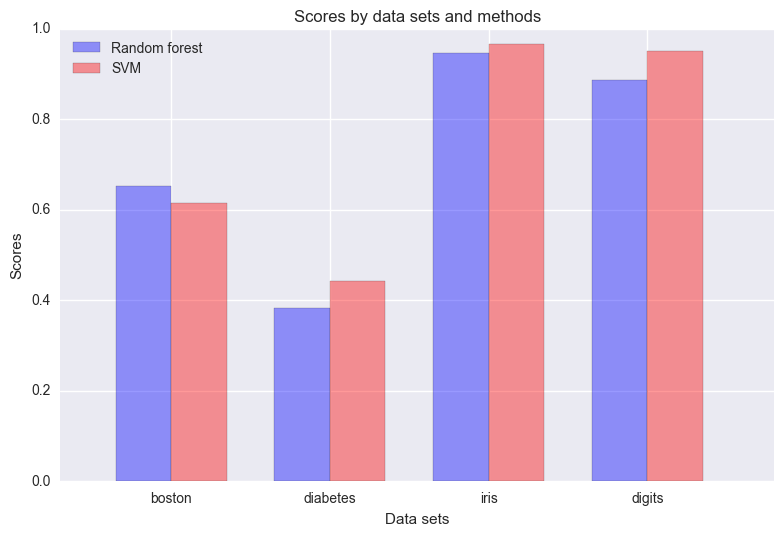

In [7]:
# Loading data sets
# boston, regression
x_boston,y_boston=load_boston().data,load_boston().target
x_boston,y_boston=preprocessing.scale(x_boston),preprocessing.scale(y_boston)
# diabetes, regression
x_diabetes,y_diabetes=load_diabetes().data,load_diabetes().target
x_diabetes,y_diabetes=preprocessing.scale(x_diabetes),preprocessing.scale(y_diabetes)
# iris, classification
x_iris,y_iris=load_iris().data,load_iris().target
x_iris=preprocessing.scale(x_iris)
# digits, classification
x_digits,y_digits=load_digits().data,load_digits().target
x_digits=preprocessing.scale(x_digits)

score_forest=list([])
score_SVM=list([])
# For regression
for (x,y) in [(x_boston,y_boston),(x_diabetes,y_diabetes)]:
    clf = RandomForestRegressor()
    score_forest.append(np.mean(cross_val_score(clf,x,y,cv=7)))
    clf = SVR()
    score_SVM.append(np.mean(cross_val_score(clf,x,y,cv=7)))
# For classification
for (x,y) in [(x_iris,y_iris),(x_digits,y_digits)]:
    reg = RandomForestClassifier()
    score_forest.append(np.mean(cross_val_score(reg,x,y,cv=7)))
    reg = SVC()
    score_SVM.append(np.mean(cross_val_score(reg,x,y,cv=7)))

fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(4)+bar_width
opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index,score_forest , bar_width,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config,
                 label='Random forest')
rects2 = plt.bar(index + bar_width, score_SVM, bar_width,
                 alpha=opacity,
                 color='r',
                 error_kw=error_config,
                 label='SVM')
plt.xlabel('Data sets')
plt.ylabel('Scores')
plt.title('Scores by data sets and methods')
plt.xticks(index + bar_width, ('boston', 'diabetes', 'iris', 'digits'))
plt.legend(loc=2)
plt.tight_layout()
plt.show()

## Question 7
<h5> Using the data-set iris, limited to the first two variables/features, show the prediction probabilities for each class.
</h5>

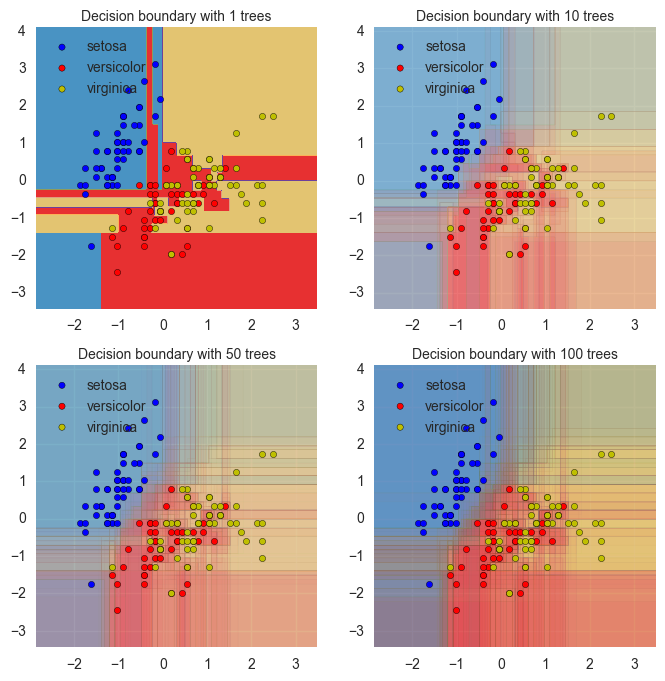

In [63]:
# Parameters
n_estimators = 100
plot_colors = "bry"
plot_step = 0.02
# Load data
iris = load_iris()
X_unscaled, y = iris.data[:, :2], iris.target
# Standardize
X = preprocessing.scale(X_unscaled)
# RF fitting
model = RandomForestClassifier(n_estimators=n_estimators)
clf = model.fit(X, y)
# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
xxyy = np.c_[xx.reshape(xx.shape[0]*xx.shape[1]) , yy.reshape(yy.shape[0]*yy.shape[1]) ]
plt.figure(figsize=[8,8])
n_tree=[1,10,50,100]
for n in n_tree:
    for tree in model.estimators_[:n]:
    # TODO use predict to obtain the probabilities you will store in Z
        Z = tree.predict(xxyy)
        Z = Z.reshape(xx.shape)
        plt.subplot(2,2,n_tree.index(n)+1)
        plt.title('Decision boundary with %d trees' % n,fontsize=10)
#         plt.xlabel('feature 1',fontsize=10)
#         plt.ylabel('feature 2',fontsize=10)
        cs = plt.contourf(xx, yy, Z, alpha=1. / n, cmap=plt.cm.Paired)
    plt.axis("tight")
    # Plot the training points
    for i, c in zip(range(3), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=c, label=iris.target_names[i],cmap=plt.cm.Paired)
    plt.legend(scatterpoints=1,loc=2,fontsize=10)
plt.show()

This contour graph shows the probability of each point in the plane being classified in each class. The probability defined as the proportion of trees which predict a certain class.<br>
For the points which the classifier can certainly classify, the color of this area will be pure; for those which are quite ambiguous and each tree may give a different results, the color of these areas will be mixed by different color according their probability.

## Question 8
<h5> Compare the scores between Random Forests with a 6-fold cross-validation and the pure decision trees.
Vary the parameter max_depth between 1 and 30. Show that both Random Forests and deep decision trees reduce the over-ﬁtting.
</h5>

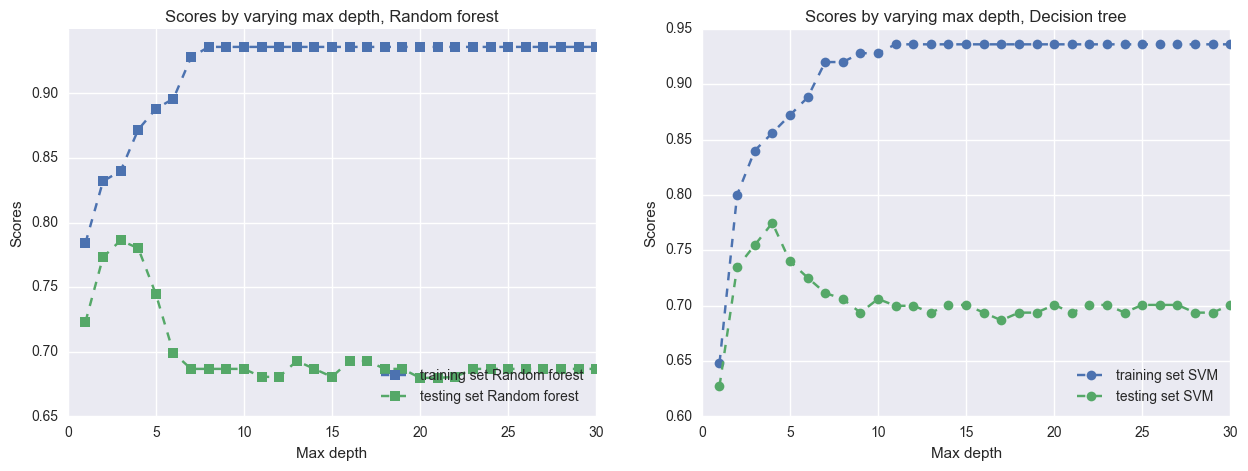

In [6]:

# iris, classification
x_iris_train, x_iris_test, y_iris_train, y_iris_test = train_test_split(x_iris, y_iris, test_size=1/6, random_state=0)
trainingscore_forest=list([])
testscore_forest=list([])
for max_depth in range(1,31):
    clf = RandomForestClassifier(n_estimators=1000, max_depth=max_depth)    
    testscore_forest.append(np.mean(cross_val_score(clf,x_iris[:,0:2],y_iris,cv=6)))
    clf.fit(x_iris_train[:,0:2], y_iris_train)
    trainingscore_forest.append(clf.score(x_iris_train[:,0:2],y_iris_train))
trainingscore_tree=list([])
testscore_tree=list([])
for max_depth in range(1,31):
    clf = DecisionTreeClassifier( max_depth=max_depth)  
    testscore_tree.append(np.mean(cross_val_score(clf,x_iris[:,0:2],y_iris,cv=6)))
    clf.fit(x_iris_train[:,0:2], y_iris_train)
    trainingscore_tree.append(clf.score(x_iris_train[:,0:2],y_iris_train))

plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.plot(range(1,31), trainingscore_forest,  '--', marker='s',label='training set Random forest')
plt.plot(range(1,31), testscore_forest, '--', marker='s',label='testing set Random forest')
plt.xlabel('Max depth')
plt.ylabel('Scores')
plt.title('Scores by varying max depth, Random forest')
plt.legend(fontsize=10,loc=4)
plt.subplot(1,2,2)
plt.plot(range(1,31), trainingscore_tree,  '--', marker='o',label='training set SVM')
plt.plot(range(1,31), testscore_tree, '--', marker='o',label='testing set SVM')
plt.xlabel('Max depth')
plt.ylabel('Scores')
plt.title('Scores by varying max depth, Decision tree')
plt.legend(fontsize=10,loc=4)
plt.show()


Seeing from the two graphs above, when max tree depth increases, the training score will be improved to its celling and then remains unchanged, but the test score will reach to its maximum and then decrease sharply.<br>
This means both random forest and pure decision will lead to overfitting when max tree depth reach a certain threshold.<br>
In decision trees, overfitting occurs when the tree is designed so as to perfectly fit all samples in the training data set, thus it ends up with branches with strict rules of sparse data. Thus this effects the accuracy when predicting samples that are not part of the training set.<br>
From the variation of test score, we can conclude for iris data set, the optimal max depth for pure decision tree will be 4, and for random forest it wil be 3.

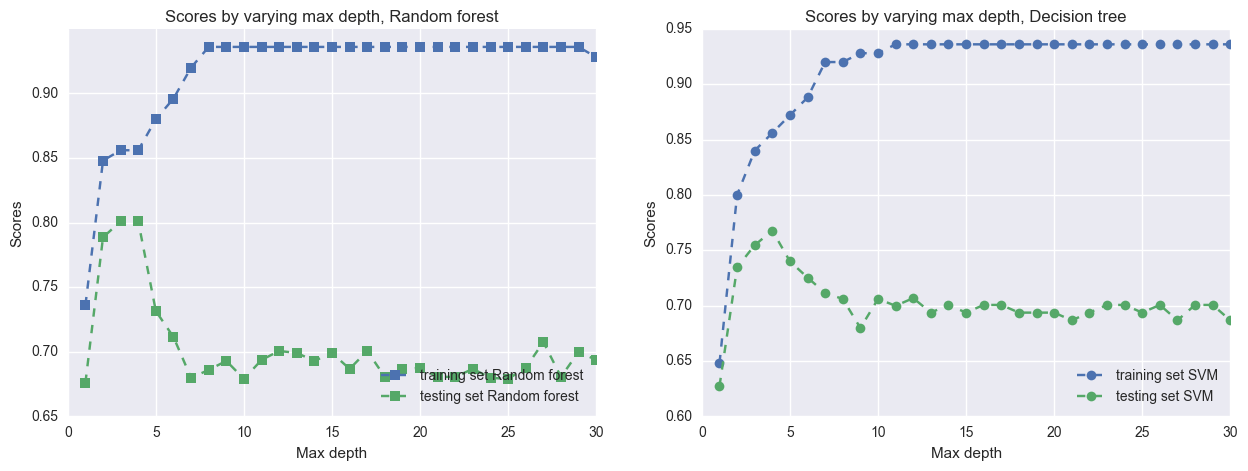

In [14]:

# iris, classification
x_iris_train, x_iris_test, y_iris_train, y_iris_test = train_test_split(x_iris, y_iris, test_size=1/6, random_state=0)
trainingscore_forest=list([])
testscore_forest=list([])
for max_depth in range(1,31):
    clf = RandomForestClassifier(n_estimators=50, max_depth=max_depth)    
    testscore_forest.append(np.mean(cross_val_score(clf,x_iris[:,0:2],y_iris,cv=6)))
    clf.fit(x_iris_train[:,0:2], y_iris_train)
    trainingscore_forest.append(clf.score(x_iris_train[:,0:2],y_iris_train))
trainingscore_tree=list([])
testscore_tree=list([])
for max_depth in range(1,31):
    clf = DecisionTreeClassifier( max_depth=max_depth)  
    testscore_tree.append(np.mean(cross_val_score(clf,x_iris[:,0:2],y_iris,cv=6)))
    clf.fit(x_iris_train[:,0:2], y_iris_train)
    trainingscore_tree.append(clf.score(x_iris_train[:,0:2],y_iris_train))

plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.plot(range(1,31), trainingscore_forest,  '--', marker='s',label='training set Random forest')
plt.plot(range(1,31), testscore_forest, '--', marker='s',label='testing set Random forest')
plt.xlabel('Max depth')
plt.ylabel('Scores')
plt.title('Scores by varying max depth, Random forest')
plt.legend(fontsize=10,loc=4)
plt.subplot(1,2,2)
plt.plot(range(1,31), trainingscore_tree,  '--', marker='o',label='training set SVM')
plt.plot(range(1,31), testscore_tree, '--', marker='o',label='testing set SVM')
plt.xlabel('Max depth')
plt.ylabel('Scores')
plt.title('Scores by varying max depth, Decision tree')
plt.legend(fontsize=10,loc=4)
plt.show()
